# STACK OVERFLOW SURVEY DATA ANALYSIS

The code includes the analysis of Stack Overflow survey dataset based on three business related questions.

## SECTION 1 : Business Understanding

Stack Overflow is probably the best friend of many of the software developers. The platform did a survey and shared the results publicly. In this post, I’m going to talk about the analysis of this dataset based on three business related questions.

##### Q1: What is the average salary distribution based on the undergrad major?

##### Q2: What is the relationship between the career satisfaction and the company type?

##### Q3: What is the relationship between the job satisfaction and the time of starting to work?

#### Importing libraries

Importing the necessary libraries that have been used in the project

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.colors import ListedColormap

## SECTION 2 : Data Understanding

#### Gathering data

In [4]:
#A function to read the data
def read_data(name):
    '''
    returns the elements of a given dataset
    
    input:
        name: name of the csv file to read
    output: 
        df: contents of the csv file
    '''
    df = pd.read_csv(name)
    return df  

In [5]:
df = read_data("survey-results-public.csv")
df.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN


## SECTION 3 : Data Preparation

Based on the questions chosen in this project, some columns have NA values and they need to be dropped or imputed with a related value

#### Clean the data by dropping the NA values

In [6]:
#drop the row that does not have a salary input
sal_rm = df.dropna(subset=['Salary'], axis=0) 

In [7]:
#drop the row that does not have a company type
new_df = df.dropna(subset=['CompanyType'], axis=0)

In [8]:
#drop the row that does not have a work start value
time_df = df.dropna(subset=["WorkStart"], axis=0)

#### Imputing data

In [9]:
#impute the mode where career satisfaction is not defined
new_df['CareerSatisfaction'] = new_df['CareerSatisfaction'].fillna(new_df['CareerSatisfaction'].mode()[0])

/cloudera/jupyter/jupyter_workspace/dilan.uslan/.conda/envs/spark37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
#imputing the mode where job satisfaction is not defined by the respondent
time_df['JobSatisfaction'] = time_df['JobSatisfaction'].fillna(time_df['JobSatisfaction'].mode()[0])

/cloudera/jupyter/jupyter_workspace/dilan.uslan/.conda/envs/spark37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## SECTION 4 : Evaluation & Results

### Q1 - What is the average salary distribution based on the undergrad major?

For the common sense, we do expect that Stack Overflow is more used by the software developers and these people have related backgrounds. Therefore, I wanted to see if that's the real case.

#### Analyze the data

In [11]:
#checking for which answer got how many responses
sal_rm["MajorUndergrad"].value_counts()

Computer science or software engineering                        6483
Computer engineering or electrical/electronics engineering      1097
Computer programming or Web development                          992
A natural science                                                491
Information technology, networking, or system administration     477
Mathematics or statistics                                        447
A non-computer-focused engineering discipline                    425
A humanities discipline                                          278
Something else                                                   274
A business discipline                                            222
Fine arts or performing arts                                     195
Management information systems                                   182
A social science                                                 165
I never declared a major                                         162
Psychology                        

In [12]:
#calculating the average salary for each of the majors
data = sal_rm.groupby(['MajorUndergrad'], as_index=False)['Salary'].mean()

In [13]:
#data is sorted to have a good looking outcome
data = data.sort_values(by=['Salary'])

#### Viusalize the data

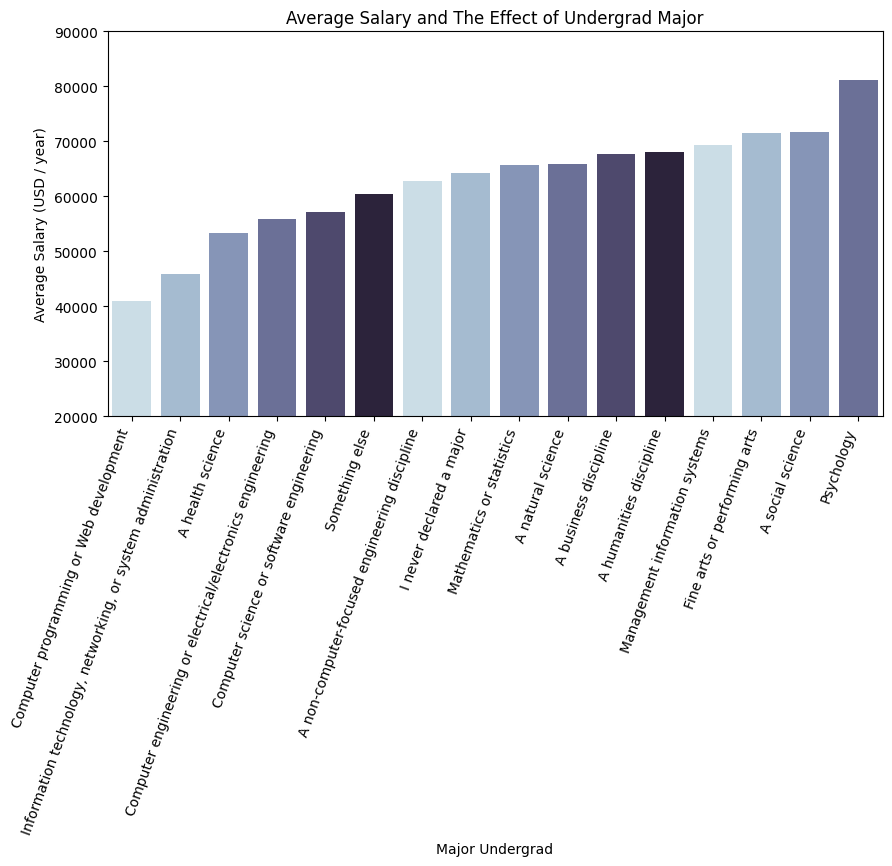

In [14]:
#plotting the data
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='MajorUndergrad', y='Salary', palette=sns.color_palette("ch:s=.25,rot=-.25"))
plt.ylim(20000,90000)
plt.title('Average Salary and The Effect of Undergrad Major')
plt.ylabel('Average Salary (USD / year)')
plt.xlabel('Major Undergrad')
plt.xticks(rotation=70, horizontalalignment= "right")
plt.show()

The results shows that the top 5 majors are not related with computers at all.

## Q2 - What is the relationship between the career satisfaction and the company type?

The idea here was to understand if people are more satisfied in companies that will help them to develop.

#### Analyze the data

In [15]:
#find out how many respondents answered for each company type
final_data = new_df.groupby(['CompanyType','CareerSatisfaction'], as_index=False)['Respondent'].count()

# Adding percentages of the columns
total_respondents_per_company = new_df['CompanyType'].value_counts()

final_data['Respondent Percentage'] = final_data.apply(lambda x: x['Respondent'] / total_respondents_per_company[x['CompanyType']], axis=1).round(3)

# Pivoting the data
final_data = final_data[['CompanyType', 'CareerSatisfaction', 'Respondent Percentage']]

pivoted_data = pd.pivot_table(final_data, values='Respondent Percentage', index='CompanyType', columns='CareerSatisfaction').sort_values(by=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], ascending=False)


#### Viusalize the data

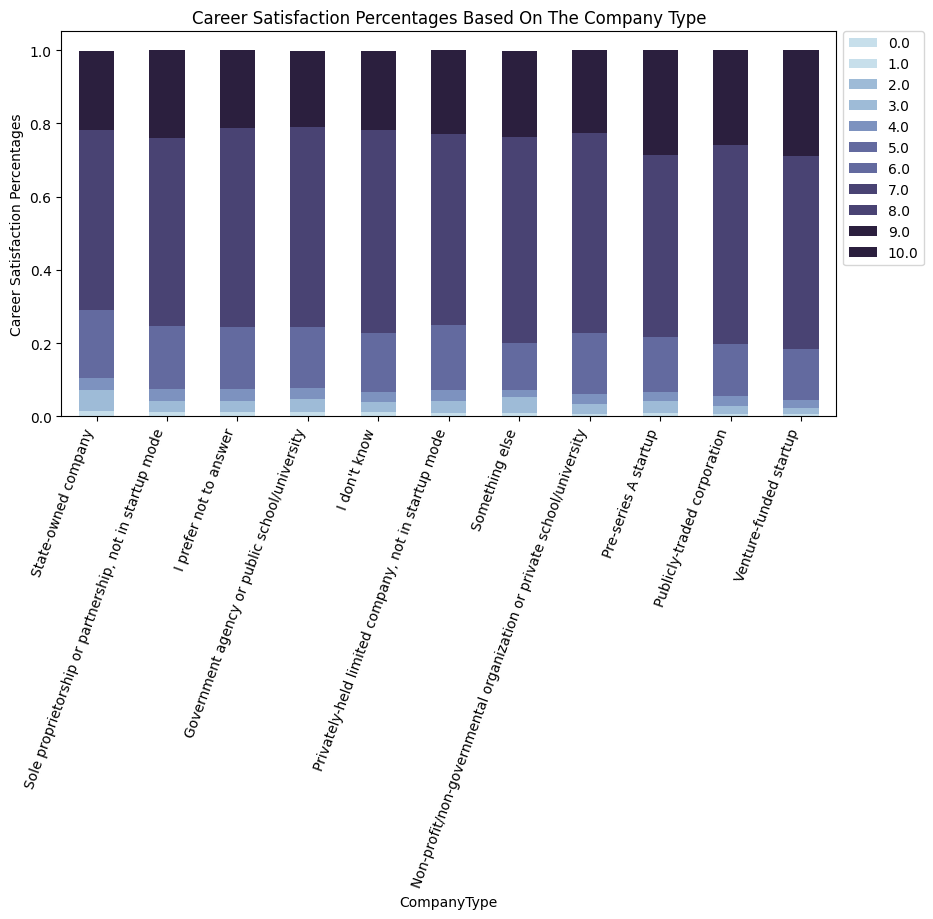

In [16]:
#plotting the pivoted data as a bar char  
pivoted_data.plot(kind='bar', 
                  stacked=True, 
                  colormap=ListedColormap(sns.color_palette("ch:s=.25,rot=-.25")),
                  figsize=(10,5))
plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('Career Satisfaction Percentages')
plt.title('Career Satisfaction Percentages Based On The Company Type')
plt.xticks(rotation=70, horizontalalignment= "right")
plt.show()

From the graph, we can see that people who work in startups are more satisfied with their careers.

## Q3 - What is the relationship between the job satisfaction and the time of starting to work?

As a 8 to 5 working person, the flexibility on the working hours is very important to me and I do believe that it’s the same for many others. I wanted to explore which people have more job satisfaction based on their starting time.

#### Analyze the data

In [17]:
#check for how many people answered for each value
time_df["WorkStart"].value_counts()

9:00 AM     9401
10:00 AM    9091
8:00 AM     7076
7:00 AM     3364
11:00 AM    2212
6:00 AM     1216
Noon        1146
2:00 PM      443
1:00 PM      399
5:00 AM      294
8:00 PM      280
6:00 PM      254
4:00 PM      249
10:00 PM     212
3:00 PM      206
9:00 PM      156
5:00 PM      134
7:00 PM      127
4:00 AM      123
Midnight      90
11:00 PM      85
1:00 AM       53
3:00 AM       50
2:00 AM       35
Name: WorkStart, dtype: int64

In [18]:
#calculate the average job satisfaction for each starting time
finaldf = time_df.groupby(['WorkStart'], as_index=False)['JobSatisfaction'].mean()

In [19]:
#sorting the values to have a better graph
finaldf = finaldf.sort_values(by=['JobSatisfaction'])

#### Viusalize the data

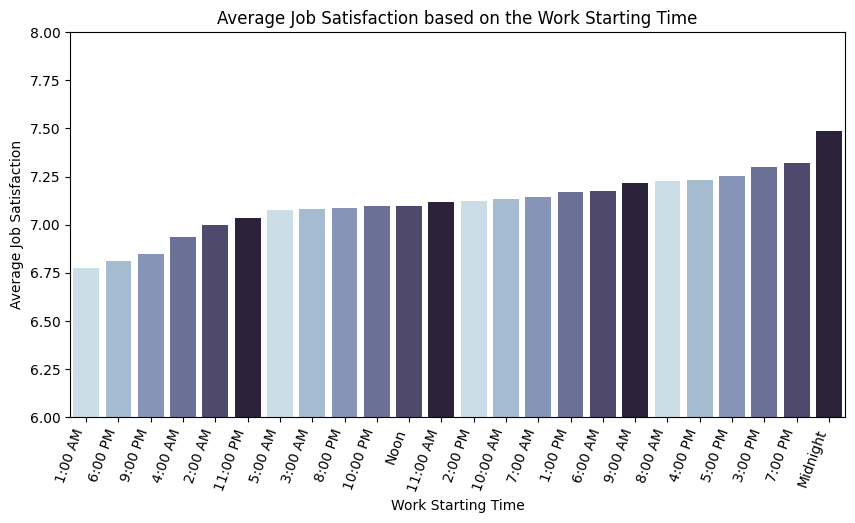

In [20]:
#plotting the final dataframe 
plt.figure(figsize=(10, 5))
sns.barplot(data=finaldf, x='WorkStart', y='JobSatisfaction', palette=sns.color_palette("ch:s=.25,rot=-.25"))
plt.ylim(6.0,8.0)
plt.title('Average Job Satisfaction based on the Work Starting Time')
plt.ylabel('Average Job Satisfaction')
plt.xlabel('Work Starting Time')
plt.xticks(rotation=70, horizontalalignment= "right")
plt.show()

I found the outcome very interesting here because I was expecting to see more satisfaction at the earlier hours, for example between 9 AM to 12 AM.